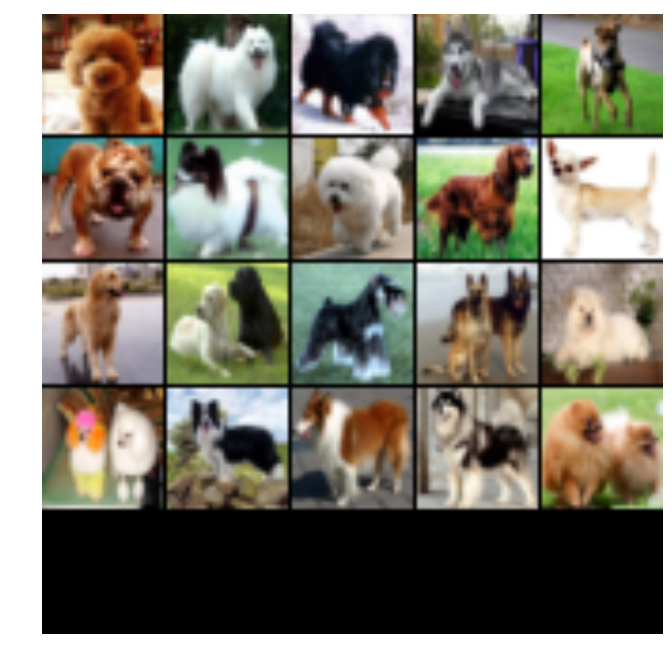

(20L, 32L, 32L, 3L)
(20L, 3L, 32L, 32L)


In [1]:
from scipy.misc import imread
from scipy.misc import imresize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from cs231n.vis_utils import visualize_grid

dog_images = np.zeros([20,32,32,3])

for i in range(20):
    filename= "images\jpegs\dog" + str(i+1).rjust(2, '0') + ".jpg"
    im = imread(filename)
    newimg = imresize(im, (32,32))
    dog_images[i] = newimg
    plt.imshow(dog_images[i].astype('uint8'))
    
grid = visualize_grid(dog_images)
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(8,8)
plt.show()

print dog_images.shape
test_images = np.transpose(dog_images, (0,3,1,2))
print test_images.shape

In [8]:
from cs231n.classifiers.convnet3 import *

classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

outfile = 'bestparams-1.npz'
npzfile = np.load(outfile)

params = npzfile['params'].item()
bn_params = npzfile['bn_params'].item()

# This was the model that was trained

model = DeepConvNet3(num_filters=[[32,64,64],[128,128,128]], filter_sizes=[[3,3,3],[3,3,3]], weight_scale=1e-2, 
                    hidden_dim=500, verbose=False, reg = 0, use_batchnorm=True)

model.params = params  # Transfer parameters from pre-trained model
model.bn_params = bn_params  # Transfer parameters from pre-trained model

scores = np.argmax(model.loss(test_images[:20]), axis=1)
for i in scores:
    print classes[i]

N, __,__,__ = test_images.shape
accuracy = np.sum(scores==5)/float(N)
print accuracy


dog
dog
horse
ship
horse
cat
dog
dog
horse
dog
horse
dog
dog
horse
dog
dog
horse
dog
dog
dog
0.6
